In [1]:
## 01_Artificial Neural Network (ANN) Implementation for Image Classification.ipynb

# Import library
import requests, zipfile, shutil, os
requests.packages.urllib3.disable_warnings()
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2023-11-25 04:06:41.174033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 04:06:49.328956: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-11-25 04:06:49.329670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: 

In [2]:
# Define the URL to download the dataset #https://www.muratkoklu.com/datasets/
dataset_url = "https://www.muratkoklu.com/datasets/vtdhnd12.php"

# Download the dataset to a temporary file
response = requests.get(dataset_url)
with open("pistachio_dataset.zip", "wb") as f:
    f.write(response.content)

# Extract the dataset from the ZIP file
with zipfile.ZipFile("pistachio_dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

# Delete the temporary ZIP file
os.remove("pistachio_dataset.zip")

# Define the source directories for the downloaded images
kirmizi_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/"
siirt_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio/"

# Define the directories for train, test, and validation sets for both categories
train_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi"
test_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi"
validation_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi"

train_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt"
test_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt"
validation_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt"

# Create directories for train, test, and validation sets for both categories
for directory in [train_dir_kirmizi, test_dir_kirmizi, validation_dir_kirmizi,
                  train_dir_siirt, test_dir_siirt, validation_dir_siirt]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the number of images to copy for each set
train_images = 70
test_images = 10
validation_images = 20

# Copy Kirmizi images
kirmizi_image_files = os.listdir(kirmizi_dir)
np.random.shuffle(kirmizi_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Copy Siirt images
siirt_image_files = os.listdir(siirt_dir)
np.random.shuffle(siirt_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)

In [3]:
# Define the path to the downloaded dataset
train_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/"
test_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/"
validation_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/"

# Image data preprocessing
train_imagerescale = ImageDataGenerator(rescale=1./255) ### RGB to convert 0,1
test_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1
validation_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1

train_images = train_imagerescale.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)

test_images = test_imagerescale.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)

validation_images = validation_imagerescale.flow_from_directory(
    validation_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)
print(f"Print the class binary: {train_images.class_indices}")

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Print the class binary: {'kirmizi': 0, 'siirt': 1}


In [4]:
# Define the ANN model
model = models.Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation = 'relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(layers.Dense(1, activation = 'sigmoid'))

# Show model summary
model.summary()

2023-11-25 04:07:04.395119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-25 04:07:04.416197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-25 04:07:04.419007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-25 04:07:04.424611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [5]:
# Compile the ANN model with binary cross-entropy loss and binary accuracy metric
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['binary_accuracy']
)

In [6]:
# Train the ANN model
history = model.fit(train_images, validation_data=test_images,epochs=25)

Epoch 1/25


2023-11-25 04:07:11.528480: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200
2023-11-25 04:07:15.140132: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fd0726b5c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-25 04:07:15.140192: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-11-25 04:07:15.149865: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-25 04:07:15.412253: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 13s 364ms/step - loss: 0.6880 - binary_accuracy: 0.5000 - val_loss: 0.6841 - val_binary_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 1s 175ms/step - loss: 0.6819 - binary_accuracy: 0.5000 - val_loss: 0.6788 - val_binary_accuracy: 0.5000
Epoch 3/25
5/5 [==============================] - 1s 202ms/step - loss: 0.6750 - binary_accuracy: 0.5286 - val_loss: 0.6721 - val_binary_accuracy: 0.5000
Epoch 4/25
5/5 [==============================] - 1s 194ms/step - loss: 0.6694 - binary_accuracy: 0.6929 - val_loss: 0.6639 - val_binary_accuracy: 0.7500
Epoch 5/25
5/5 [==============================] - 1s 165ms/step - loss: 0.6593 - binary_accuracy: 0.7786 - val_loss: 0.6554 - val_binary_accuracy: 0.7000
Epoch 6/25
5/5 [==============================] - 1s 218ms/step - loss: 0.6473 - binary_accuracy: 0.8214 - val_loss: 0.6453 - val_binary_accuracy: 0.7000
Epoch 7/25
5/5 [==============================] - 1s 220ms/step - loss: 0.6352 - binar

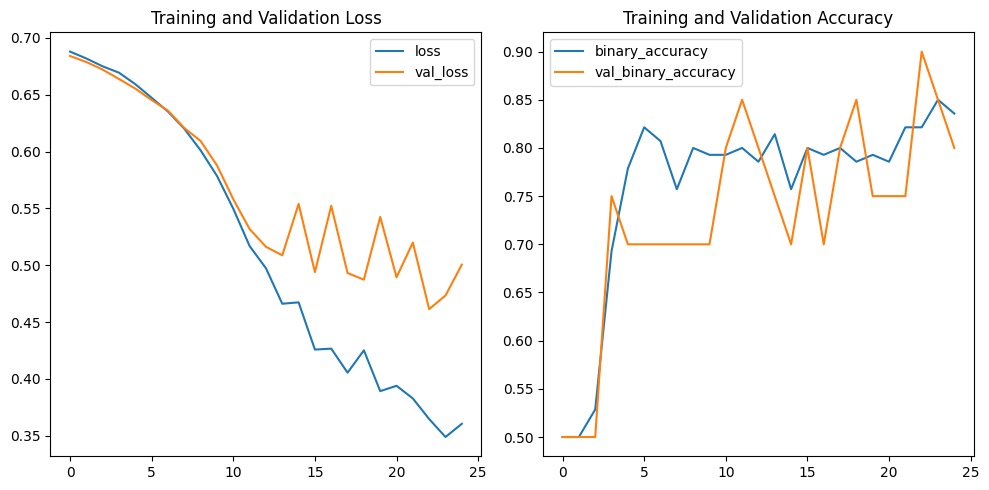

In [7]:
# Plot training history for ANN model
history_frame = pd.DataFrame(history.history)

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
history_frame.loc[:, ['loss', 'val_loss']].plot(ax=plt.gca())
plt.title('Training and Validation Loss')

# Plotting Accuracy
plt.subplot(1, 2, 2)
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=plt.gca())
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

2/2 [==============================] - 0s 179ms/step - loss: 0.2967 - binary_accuracy: 0.8750
Validation Test accuracy:: 87.50%


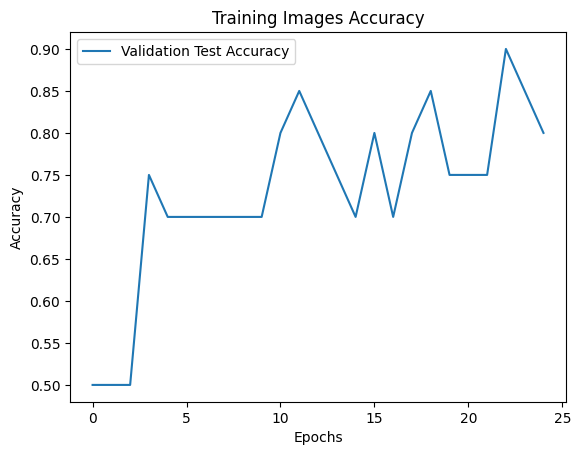

In [8]:
# Evaluate the model on the validation set
test_loss, val_acc = model.evaluate(validation_images)
print(f'Validation Test accuracy:: {val_acc * 100:.2f}%')

# Plotting the test accuracy
plt.plot(history.history['val_binary_accuracy'], label='Validation Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Images Accuracy')
plt.show()

In [9]:
print('*' * 40)
print('Running 2nd model with Data Augmentation')
print('*' * 40)

****************************************
Running 2nd model with Data Augmentation
****************************************


In [10]:
# Data Augmentation and 2nd model
train_imagerescale = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
train_images = train_imagerescale.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    class_mode = 'binary'
)

test_imagerescale = ImageDataGenerator(rescale=1./255)
test_images = test_imagerescale.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    class_mode = 'binary'
)

validation_imagerescale = ImageDataGenerator(rescale=1./255)
validation_images = validation_imagerescale.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    class_mode = 'binary'
)

# Define the ANN model
model = models.Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation = 'relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(layers.Dense(1, activation = 'sigmoid'))

# Show model summary
model.summary()

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     

In [11]:
# Compile the ANN model with binary cross-entropy loss and binary accuracy metric
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['binary_accuracy']
)

# Train the ANN model
history = model.fit(train_images, validation_data=test_images,epochs=23)


Epoch 1/23
5/5 [==============================] - 7s 524ms/step - loss: 0.6956 - binary_accuracy: 0.4857 - val_loss: 0.6893 - val_binary_accuracy: 0.5000
Epoch 2/23
5/5 [==============================] - 2s 430ms/step - loss: 0.6902 - binary_accuracy: 0.5000 - val_loss: 0.6894 - val_binary_accuracy: 0.5000
Epoch 3/23
5/5 [==============================] - 2s 467ms/step - loss: 0.6957 - binary_accuracy: 0.5000 - val_loss: 0.6893 - val_binary_accuracy: 0.5000
Epoch 4/23
5/5 [==============================] - 2s 412ms/step - loss: 0.6880 - binary_accuracy: 0.5000 - val_loss: 0.6860 - val_binary_accuracy: 0.5000
Epoch 5/23
5/5 [==============================] - 2s 351ms/step - loss: 0.6864 - binary_accuracy: 0.5286 - val_loss: 0.6804 - val_binary_accuracy: 0.5000
Epoch 6/23
5/5 [==============================] - 2s 478ms/step - loss: 0.6839 - binary_accuracy: 0.5714 - val_loss: 0.6773 - val_binary_accuracy: 0.7000
Epoch 7/23
5/5 [==============================] - 2s 458ms/step - loss: 0.68

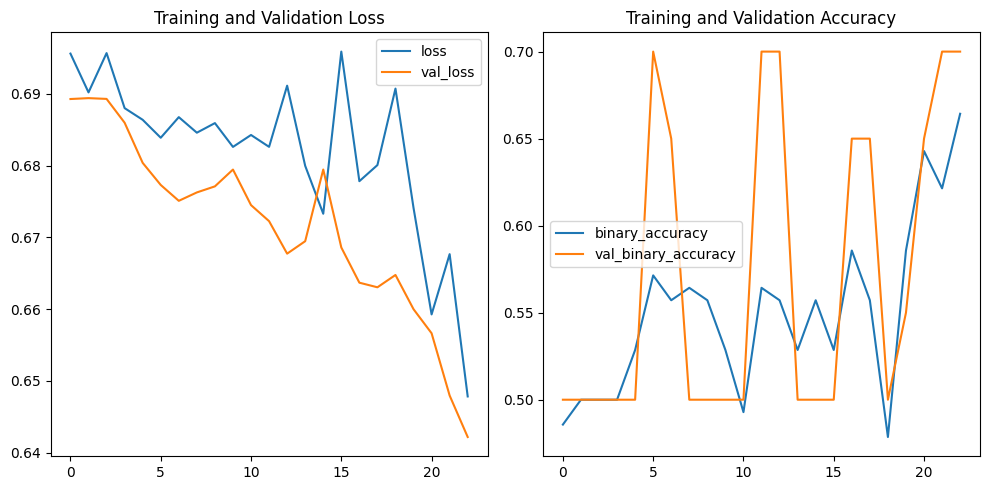

In [12]:
# Plot training history for ANN model
history_frame = pd.DataFrame(history.history)

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
history_frame.loc[:, ['loss', 'val_loss']].plot(ax=plt.gca())
plt.title('Training and Validation Loss')

# Plotting Accuracy
plt.subplot(1, 2, 2)
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=plt.gca())
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

2/2 [==============================] - 0s 35ms/step - loss: 0.6288 - binary_accuracy: 0.7500
Validation Test accuracy:: 75.00%


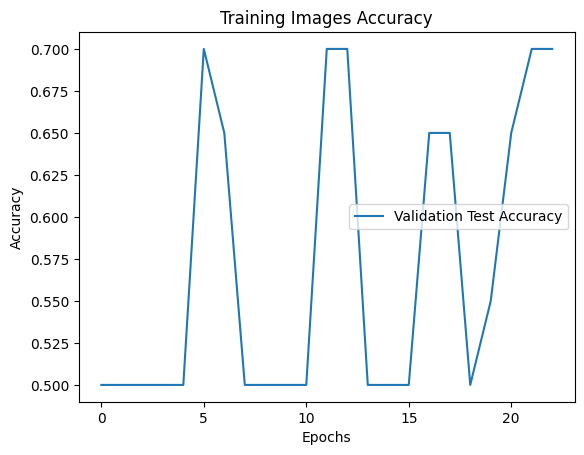

In [13]:
# Evaluate the model on the validation set
test_loss, val_acc = model.evaluate(validation_images)
print(f'Validation Test accuracy:: {val_acc * 100:.2f}%')

# Plotting the test accuracy
plt.plot(history.history['val_binary_accuracy'], label='Validation Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Images Accuracy')
plt.show()

In [14]:
# to delete the old downloaded dataset
!pwd
!rm -rf ./Pistachio_Image_Dataset
!ls Pistachio_Image_Dataset

/home/jupyter/01-ai-nn-image-dataset
ls: cannot access 'Pistachio_Image_Dataset': No such file or directory
